In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
data = fetch_openml(name="Fashion-MNIST", version=1)

In [3]:
X = data["data"]
X["Target"] = data["target"]
X = X.sample(frac=1).reset_index(drop=True)
y = X["Target"].copy()
del X["Target"]
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,214.0,241.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,120.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,130.0,89.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,0.0,...,135.0,100.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,207.0,...,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


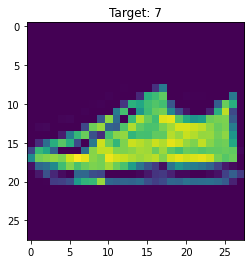

In [4]:
def plot_image_by_index(i):
    plt.imshow(X.iloc[i].values.reshape(28,28))
    plt.title(f"Target: {y.iloc[i]}")


plot_image_by_index(159)

In [5]:
"""
Random Forrest Classifier
"""

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score


#model_rf = RandomForestClassifier()

#model_rf.fit(X=X_train, y=y_train)

#print(f"""
#Acc Train: {accuracy_score(
#    y_true=y_train,
#    y_pred=model_rf.predict(X_train),
#)}

#Acc Test: {accuracy_score(
#    y_true=y_test,
#    y_pred=model_rf.predict(X_test),
#)}
#""")

"""
plain random forest Accuracy: 0.8802597402597403
"""

'\nplain random forest Accuracy: 0.8802597402597403\n'

In [6]:
"""
Let's beat it by learning torch

Based on https://pytorch.org/tutorials/beginner/nn_tutorial.html
"""

"\nLet's beat it by learning torch\n\nBased on https://pytorch.org/tutorials/beginner/nn_tutorial.html\n"

In [7]:
from sklearn.model_selection import train_test_split

X_train_torch, X_test_torch, y_train_torch, y_test_torch = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [8]:
import torch

In [9]:
"""pandas to torch"""

X_train_torch, y_train_torch, X_test_torch, y_test_torch = map(
    torch.tensor, (
        X_train_torch.values,
        y_train_torch.to_numpy().astype("float"),
        X_test_torch.values,
        y_test_torch.to_numpy().astype("float")
    )
)

X_train_torch, y_train_torch, X_test_torch, y_test_torch = \
    X_train_torch.double(), y_train_torch.long(), X_test_torch.double(), y_test_torch.long()


In [10]:
"""
nn with torch tensors form scratch
"""

'\nnn with torch tensors form scratch\n'

In [12]:
# resetting weights and biases
import math

weights = (torch.randn(784, 10) / math.sqrt(784)).double()  # "Xavier initialisation"
weights.requires_grad_()  # trailing _ in pytorch means "inplace"
bias = torch.zeros(10, requires_grad=True)

def log_softmax(x):
    """
    activation function
    """
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    """
    linear model layer with log softmax activation
    param xb: training batch
    """
    return log_softmax(xb @ weights + bias)  # @ is matrix multiplication

def nll(preds, target):
    """
    negative log likelihood
    """
    return -preds[range(target.shape[0]), target].mean()  #TODO: where is the log?

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()


loss_func = nll

lr = 0.0001  # learning rate
epochs = 2  # how many epochs to train for
n, c = X_train_torch.shape#
bs = 60

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = X_train_torch[start_i:end_i]
        yb = y_train_torch[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        if i % 100 == 0 or i <= 10:
            print(i, loss)
        
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()
            
print(loss_func(model(xb), yb), accuracy(model(xb), yb), accuracy(model(X_test_torch), y_test_torch))

0 tensor(183.5433, dtype=torch.float64, grad_fn=<NegBackward0>)
1 tensor(105.3867, dtype=torch.float64, grad_fn=<NegBackward0>)
2 tensor(76.4675, dtype=torch.float64, grad_fn=<NegBackward0>)
3 tensor(111.7761, dtype=torch.float64, grad_fn=<NegBackward0>)
4 tensor(93.9172, dtype=torch.float64, grad_fn=<NegBackward0>)
5 tensor(89.0289, dtype=torch.float64, grad_fn=<NegBackward0>)
6 tensor(118.8034, dtype=torch.float64, grad_fn=<NegBackward0>)
7 tensor(84.5565, dtype=torch.float64, grad_fn=<NegBackward0>)
8 tensor(93.8247, dtype=torch.float64, grad_fn=<NegBackward0>)
9 tensor(52.5705, dtype=torch.float64, grad_fn=<NegBackward0>)
10 tensor(64.5386, dtype=torch.float64, grad_fn=<NegBackward0>)
100 tensor(9.3052, dtype=torch.float64, grad_fn=<NegBackward0>)
200 tensor(12.6193, dtype=torch.float64, grad_fn=<NegBackward0>)
300 tensor(24.9707, dtype=torch.float64, grad_fn=<NegBackward0>)
400 tensor(19.7237, dtype=torch.float64, grad_fn=<NegBackward0>)
500 tensor(11.3018, dtype=torch.float64, gr

In [ ]:
"""
Same now with nn module
"""

In [13]:
from torch import nn
import torch.nn.functional as F

ce_loss_func = F.cross_entropy

class FMnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = .1  # learning rate
        self.epochs = 10
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784)).double()
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias
    

    def fit(self):
        for epoch in range(epochs):
            for i in range((n - 1) // bs + 1):
                start_i = i * bs
                end_i = start_i + bs
                xb = X_train_torch[start_i:end_i]
                yb = y_train_torch[start_i:end_i]
                pred = model(xb)
                #loss = loss_func(pred, yb)
                loss = ce_loss_func(pred, yb)
                if i % 700 == 0 :
                    print(i, loss)

                loss.backward()
                with torch.no_grad():
                    for p in model.parameters():
                        p -= p.grad * lr
                    model.zero_grad()
        print(ce_loss_func(model(xb), yb), accuracy(model(X_test_torch), y_test_torch))

model = FMnist_Logistic()
model.fit()

0 tensor(197.0609, dtype=torch.float64, grad_fn=<NllLossBackward0>)
700 tensor(187.9925, dtype=torch.float64, grad_fn=<NllLossBackward0>)
0 tensor(197.0433, dtype=torch.float64, grad_fn=<NllLossBackward0>)
700 tensor(187.9754, dtype=torch.float64, grad_fn=<NllLossBackward0>)
tensor(182.3930, dtype=torch.float64, grad_fn=<NllLossBackward0>) tensor(0.1474)
